# 方差分析
方差分析是数据分析中最常见的统计模型，用于探讨连续型变量和分类型变量之间的 关系，当分类型变量的因子中包含等于或超过三个类别的情况下，检验其各类别见平 均数是否相等的统计模式。    
   
方差分析主要依靠F-分布为概率分布的依据，利用平方和(sun  of square)与自由度 (degree  of  freedom)所计算的组间和组内均方(mean  of  square)估计出F值。  

含有多个分类时也可以用T检验两两分析，但是两两分析会导致多重比较，而致使第一 类错误的机会升高。因此比较多组平均数是否有差异主要用方差分析。   

## 方差分析前提假设


广义而言，方差分析一共有三大前提假设(与T 检验类似):

- 各组样本均服从正态分布或逼近正态分布。 
- 各组样本必须相互独立
- 各组的方差必须相等

## 方差分析的基本数据

|  水平  |  观测值  |  总体  |
|----|----|----|
|  M₁  |  $x_{11}, x_{12}, \ldots, x_{1 n_1}$  |  $N\left(\mu_1, \sigma^2\right)$  |
|  M₂  |  $x_{21}, x_{22}, \ldots, x_{2 n_2}$  |  $N\left(\mu_2, \sigma^2\right)$  |
|  .. | .. | ..  |
|  Mk  |  $x_{k 1}, x_{k 2}, \ldots, x_{k n_k}$  |  $N\left(\mu_k, \sigma^2\right)$  |

其中$x_i$;表示第i个水平下(共k个)第j次试验结果，每个水平M;包含的观测Cn,可能不
同(即每个水平长度不等)。每个水平的方差均为σ2



## 方差分析流程


原假设：$H_0: \mu_1=\mu_2=\ldots=\mu_k$
备择假设：$H_1: \mu_i(i=1,2, \ldots, k)$ 不全相等
构造统计量：$x_{i j}$取值源自随机抽样产生的误差以及不同分类水平产生的误差，要区分 这两种差异需要将总离差平方和进行分解：

$$\begin{gathered}
S S_T=\sum_{i=1}^k \sum_{j=1}^{n_i}\left(x_{i j}-\bar{x}\right)^2 \\
=\sum_{i=1}^k \sum_{j=1}^{n_i}\left(x_{i j}-\overline{x_i}\right)^2+\sum_{i=1}^k n_i\left(\overline{x_i}-\bar{x}\right)^2=S S_E+S S_M
\end{gathered}$$

其中  $S S_E$ 是组内离差平方和，$S S_M$ 是组间离差平方和。 


## 构造F统计量

如果原假设成立，则组内均方$\frac{S S_E}{n-k}$与$\frac{S S_M}{k-1}$组间均方 之间的差异不会太大(可以证明这 两个均方均为方差σ²的无偏估计量，这里从略)。如果组间均方显著大于组内均方， 就说明水平对观测变量的影响显著。所以观测均值在不同水平下的差异转化为比较组 间均方和组内均方之间差异的大小。

于是构造F统计量如下：
$$F=\frac{S S_M /(k-1)}{S S_E /(n-k)} \sim F(k-1, n-k)$$

给定显著性水平α,从而判断是否能够拒绝原假设。



In [2]:
creditcard_exp <- read.csv("data/creditcard_exp.csv", fileEncoding = "GBK")
creditcard_exp <- na.omit(creditcard_exp)
creditcard_exp$gender <- as.factor(creditcard_exp$gender)
creditcard_exp$edu_class <- as.factor(creditcard_exp$edu_class)
creditcard_exp[runif(3, 1, nrow(creditcard_exp)), c("avg_exp", "gender")]
attach(creditcard_exp)


,avg_exp,gender
,<dbl>,<fct>
85,1175.49,0
4,856.57,1
86,1006.35,0


In [4]:
creditcard_exp


,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
,<int>,<int>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>
1,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.10236053,3
2,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.05118421,2
4,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.19721842,3
5,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.06267632,2
6,67,1,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,1681,-0.30211316,3
7,97,1,1151.15,7.048517,1,33,11.70575,1,0,38.90,11.526053,1089,0.17969737,3
8,38,1,1233.77,7.117830,1,37,11.81885,1,0,61.05,12.490895,1369,-0.67204474,3
9,100,1,802.52,6.687757,1,46,9.31260,1,0,58.74,9.053263,2116,0.25933684,2
10,30,1,2167.77,7.681454,1,40,16.28885,1,0,157.90,17.056684,1600,-0.76783421,3


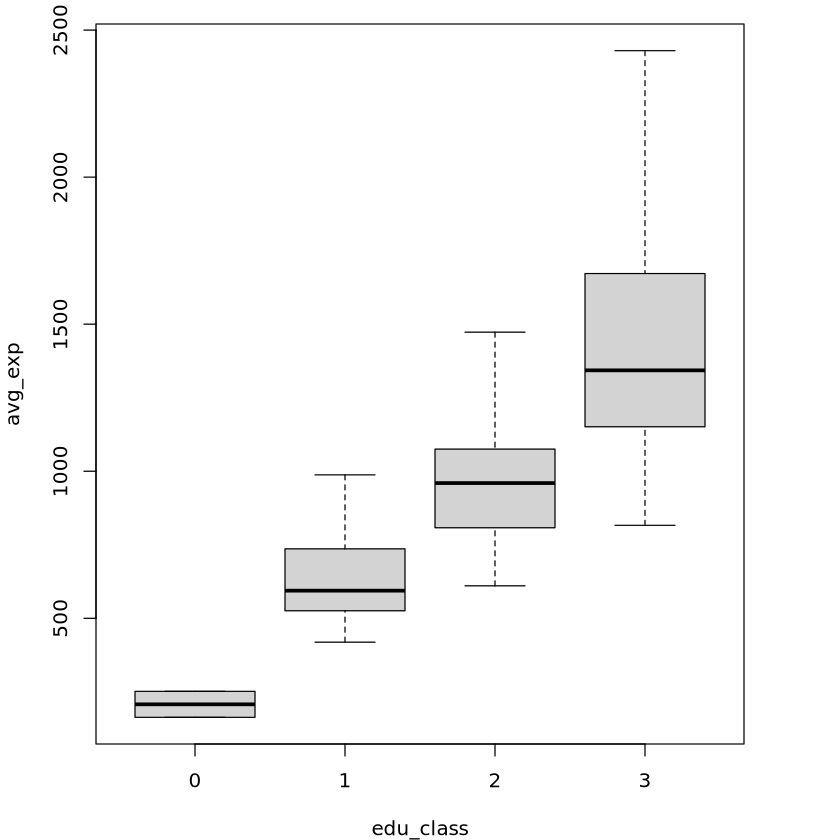

In [3]:
par(mar = c(4, 4, 1, 4))
boxplot(avg_exp ~ edu_class)


In [5]:
anova(lm(avg_exp ~ edu_class))


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
edu_class,3,8126056,2708685.47,31.82568,7.658362e-13
Residuals,66,5617263,85110.05,NA,NA


## 方差分析的另一种表示方法

方差分析的另一种表示方法类似于回归：
$$Y_i=\mu+\tau_i+\epsilon_i$$

单因素方差分析：因变量=原假设成立设定的均值十均值的变更效应十残差 i 表示分类自变量的第i 个水平。   
多因素方差分析：目标变量都是连续变量，多因素指的是多个分类变量。多个分类变 量就涉及到交互项的问题：

$$Y_i=\mu+\tau_i+\epsilon_i$$



In [7]:
mv <- data.frame(
    0:3,
    tapply(
        avg_exp, list(edu_class, gender),
        mean
    )
)
mv


,X0.3,X0,X1
,<int>,<dbl>,<dbl>
0,0,207.3700,NA
1,1,625.1790,817.905
2,2,939.6313,1036.490
3,3,1553.9408,1264.289


In [9]:
anova(lm(avg_exp ~ edu_class + gender + edu_class * gender))


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
edu_class,3,8126056.42,2708685.47,33.8393497,3.753889e-13
gender,1,41782.73,41782.73,0.5219877,4.726685e-01
edu_class:gender,2,532618.09,266309.05,3.3269736,4.230939e-02
Residuals,63,5042862.41,80045.44,NA,NA


## 交互项判断


多因素方差分析增加交互项的方法： 
- 加入所有交互项，然后观察显著性
- 只研究重点研究的变量，这时候就要区分变量：
  - 研究变量，可以人为改变的待研究的变量，比如教育水平
  - 控制变量，不易改变，不同等级间需要分开进行研究的，比如性别，只研究男或女
  - 调节变量，控制变量和研究变量的交互项

控制变量之间不做交互作用，比如性别和年龄段。交互作用一般是研究变量和控制变 量之间。